Round: 0, Q: 19.0
Round: 1, Q: 19.0
Round: 2, Q: 10.0
Round: 3, Q: 33.0
Round: 4, Q: 50.0
Round: 5, Q: 33.0
Round: 6, Q: 12.0
Round: 7, Q: 19.0
Round: 8, Q: 16.0
Round: 9, Q: 20.0
Round: 10, Q: 22.0
Round: 11, Q: 23.0
Round: 12, Q: 20.0
Round: 13, Q: 19.0
Round: 14, Q: 39.0
Round: 15, Q: 18.0
Round: 16, Q: 21.0
Round: 17, Q: 23.0
Round: 18, Q: 45.0
Round: 19, Q: 11.0
Round: 20, Q: 23.0
Round: 21, Q: 28.0
Round: 22, Q: 13.0
Round: 23, Q: 15.0
Round: 24, Q: 32.0
Round: 25, Q: 26.0
Round: 26, Q: 19.0
Round: 27, Q: 16.0
Round: 28, Q: 20.0
Round: 29, Q: 16.0
Round: 30, Q: 50.0
Round: 31, Q: 36.0
Round: 32, Q: 13.0
Round: 33, Q: 13.0
Round: 34, Q: 29.0
Round: 35, Q: 25.0
Round: 36, Q: 90.0
Round: 37, Q: 17.0
Round: 38, Q: 27.0
Round: 39, Q: 12.0
Round: 40, Q: 58.0
Round: 41, Q: 9.0
Round: 42, Q: 31.0
Round: 43, Q: 13.0
Round: 44, Q: 58.0
Round: 45, Q: 17.0
Round: 46, Q: 69.0
Round: 47, Q: 18.0
Round: 48, Q: 15.0
Round: 49, Q: 31.0
Round: 50, Q: 17.0
Round: 51, Q: 16.0
Round: 52, Q: 18.0
Roun

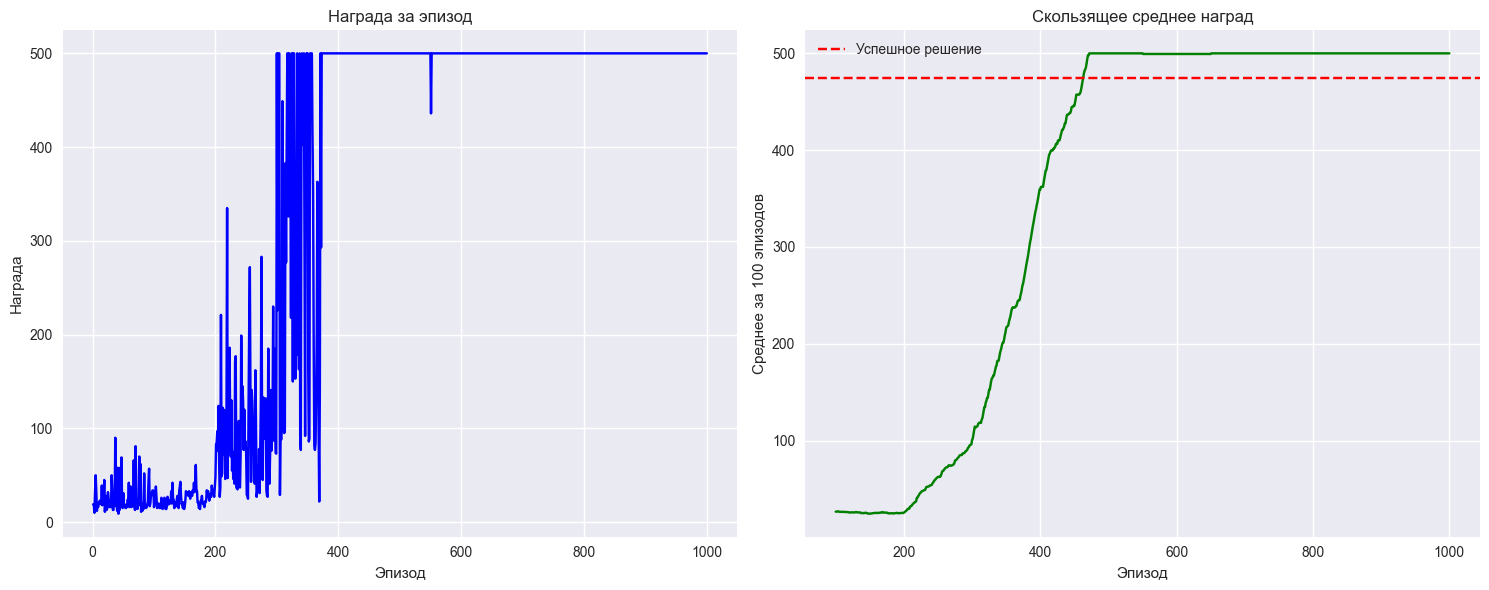

500


In [17]:
import gym
import random
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.bool8 = np.bool_
env = gym.make('CartPole-v1')
observation_space_low = np.array([-20, -100, -math.pi, -math.pi])
observation_space_high = np.array([20, 100, math.pi, math.pi])
# pieces = [16, 16, 20, 20]
# pieces = [16, 1, 20, 20]
# pieces = [1, 1, 1, 1]
# pieces = [1, 1, 20, 20]
pieces = [5, 10, 30, 20]
gamma = 0.99
learning_rate = 0.1
epsilon = 1
num_actions = 2
def discretize(observation):
    discrete_observation = [0, 0, 0, 0]
    
    observation[2] = (observation[2]+2*math.pi)%(2*math.pi)-math.pi
    
    for i in range(0, 4):
        if pieces[i] != 1:
            discrete_observation[i] = int(((observation[i]-observation_space_low[i])/(observation_space_high[i]-observation_space_low[i]))*pieces[i])
    for i in range(0, 4):
        discrete_observation[i] = max(0, min(discrete_observation[i], pieces[i]-1))
    return discrete_observation
q_table = np.ndarray(pieces+[num_actions], dtype=np.float64)
q_table.fill(0)
Q_values = []
epsilon = 1
learning_rate = 0.1
for i_episode in range(1000):
    observation, _ = env.reset()
    state = discretize(observation)
    Q = 0
    
    epsilon *= 0.99
    
    for i_step in range(500):
        
        if random.random() < epsilon:
            next_action = random.randint(0,1)
        else:
            next_action = 0 if q_table[tuple(state+[0])] > q_table[tuple(state+[1])] else 1
        
        observation, reward, t1, t2, info = env.step(next_action)
        done = t1 or t2
        Q += reward
        
        new_state = discretize(observation)
        
        max_qsa = max(q_table[tuple(new_state+[0])], q_table[tuple(new_state+[1])])
        
        q_table[tuple(state+[next_action])] += learning_rate * (reward + gamma * max_qsa - q_table[tuple(state+[next_action])])
        
        state = new_state
        
    print("Round: "+i_episode.__str__() + ", Q: "+Q.__str__())
    Q_values += [Q]
        
    env.close()

# Улучшенная визуализация - начало изменений
plt.figure(figsize=(15, 6))

# График награды за эпизод
plt.subplot(1, 2, 1)
plt.plot(range(1, len(Q_values)+1), Q_values, color='blue')
plt.xlabel('Эпизод')
plt.ylabel('Награда')
plt.title('Награда за эпизод')
plt.grid(True)

# График скользящего среднего
plt.subplot(1, 2, 2)
# Вычисление скользящего среднего за 100 эпизодов
window_size = 100
if len(Q_values) >= window_size:
    avg_rewards = []
    for i in range(len(Q_values) - window_size + 1):
        avg_rewards.append(np.mean(Q_values[i:i+window_size]))
    
    plt.plot(range(window_size, len(Q_values)+1), avg_rewards, color='green')
    plt.axhline(y=475, color='r', linestyle='--', label='Успешное решение')
    plt.xlabel('Эпизод')
    plt.ylabel('Среднее за 100 эпизодов')
    plt.title('Скользящее среднее наград')
    plt.legend()
    plt.grid(True)
else:
    plt.plot(range(1, len(Q_values)+1), Q_values, color='green')
    plt.xlabel('Эпизод')
    plt.ylabel('Награда')
    plt.title('Недостаточно данных для скользящего среднего')
    plt.grid(True)

plt.tight_layout()
plt.savefig('q_learning_results.png', dpi=300)
plt.show()
# Улучшенная визуализация - конец изменений

observation, _ = env.reset()
state = discretize(observation)
Q = 0
while(Q<500):
    Q = Q+1
    env.render()
    next_action = 0 if q_table[tuple(state+[0])] > q_table[tuple(state+[1])] else 1
    observation, reward, t1, t2, info = env.step(next_action)
    state = discretize(observation)
print(Q)
env.close()